# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('diabetes.csv')

In [12]:
!ls

diabetes.csv  sample_data


**Loading Data**

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# dataset is clean already
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [9]:
#split dataset in features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

**Splitting Data**

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 86)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [15]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Train Decision Tree Classifer
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

**Evaluating Model**

In [16]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
accuracy_score(y_test, y_pred)

[[89 38]
 [28 37]]


0.65625

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [17]:
!pip install graphviz
!pip install six
!pip install pydotplus

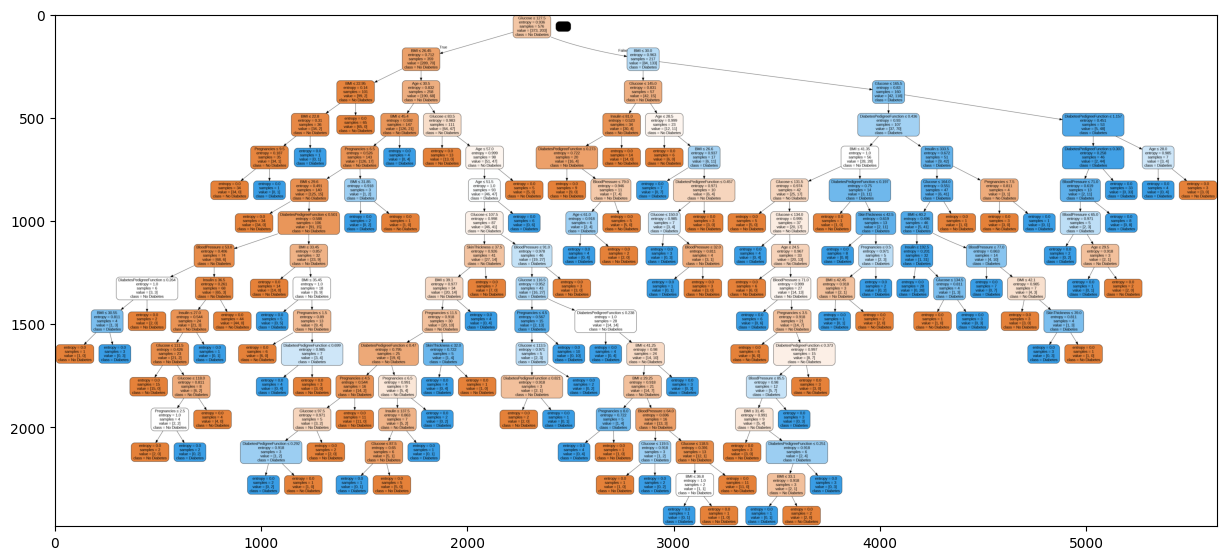

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=X.columns,
                                class_names=['No Diabetes', 'Diabetes'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree_diabetes.png')  # Save the visualization as a PNG file

plt.figure(figsize=(15, 15))
plt.imshow(plt.imread('decision_tree_diabetes.png'))
plt.show()


**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
}

# Use grid search to find the best parameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Decision Tree Classifier with the best parameters
best_classifier = DecisionTreeClassifier(**best_params, random_state=0)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAccuracy on the test set:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}

Accuracy on the test set: 0.6927083333333334

Confusion Matrix:
[[97 30]
 [29 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       127
           1       0.55      0.55      0.55        65

    accuracy                           0.69       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.69      0.69      0.69       192



**Visualizing Decision Trees**

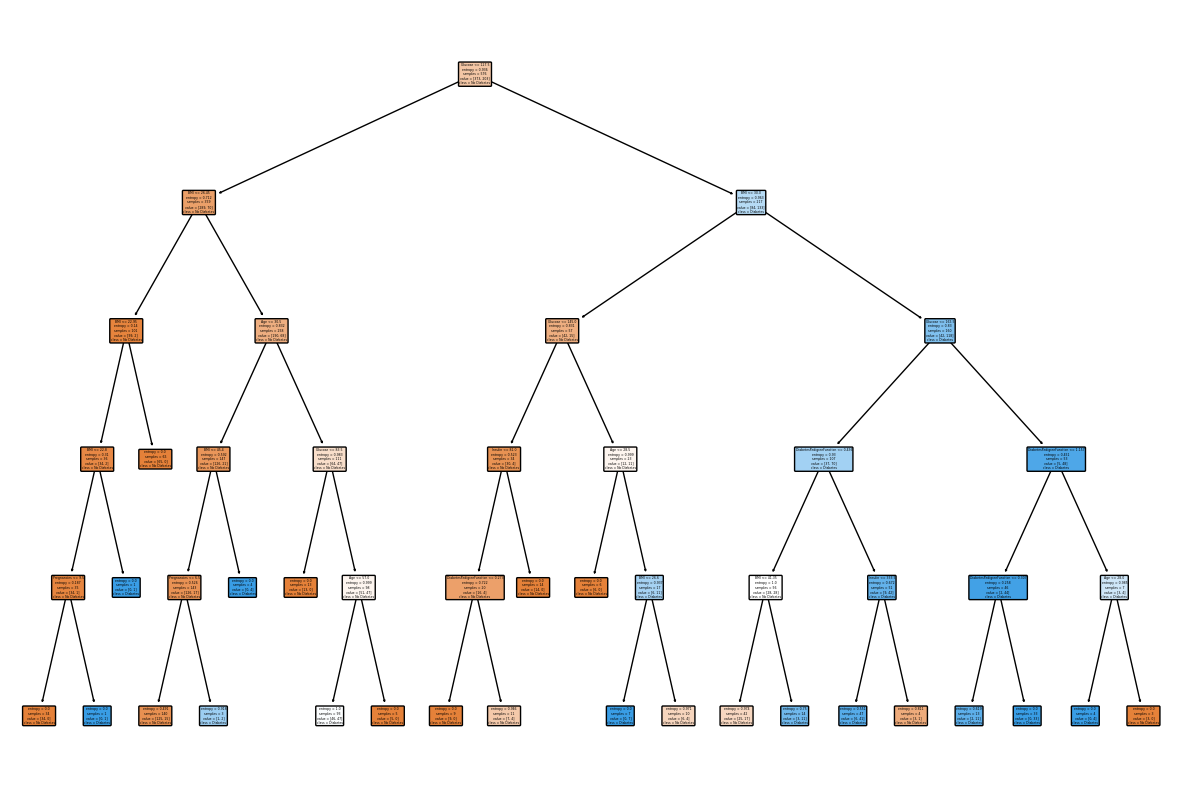

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree using tree.plot_tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


**Implement Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
# Create RandomForest Tree classifer object
rf_classifier = RandomForestClassifier(random_state=0)
# Train RandomForest Tree Classifer
rf_classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf_classifier.predict(X_test)
y_pred2= rf_classifier.predict(X_train)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy on the test set:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy on the test set: 0.75

Confusion Matrix:
[[108  19]
 [ 29  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       127
           1       0.65      0.55      0.60        65

    accuracy                           0.75       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



If the model overfitting try out different way to fix it!!

In [32]:
print('Testing Accuracy',accuracy_score(y_test, y_pred))
print('Training Accuracy',accuracy_score(y_train, y_pred2))

Testing Accuracy 0.75
Training Accuracy 1.0


This is clearly over-fitting

In [33]:
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=0)

# Train RandomForest Classifier
rf_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Testing Accuracy on the test set:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Cross-validation for model evaluation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)


Testing Accuracy on the test set: 0.7604166666666666

Confusion Matrix:
[[109  18]
 [ 28  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.67      0.57      0.62        65

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192


Cross-Validation Scores: [0.81896552 0.71304348 0.7826087  0.73913043 0.77391304]


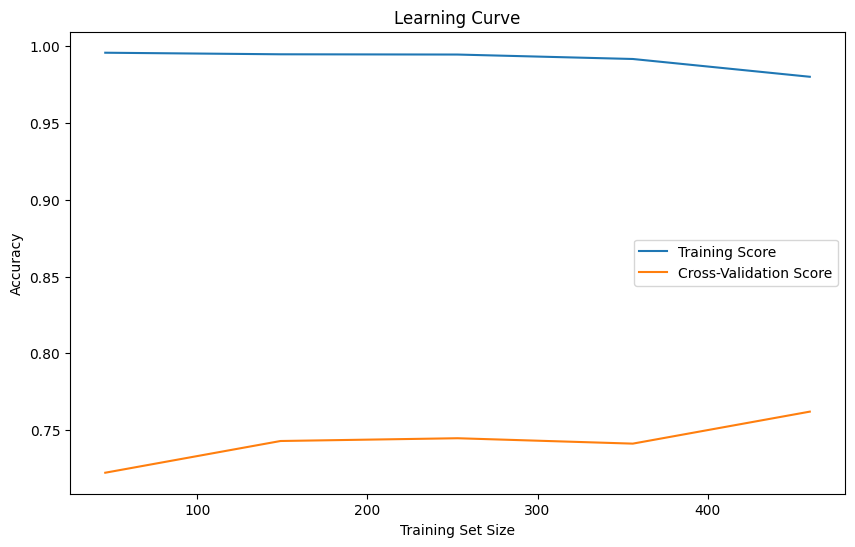

In [35]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_train, y_train, cv=5)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


### All the best!!! I hope you will Enjoy the Task!